<a href="https://colab.research.google.com/github/laurenx1/learning-systems/blob/main/ps6_linear_regression_weight_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the data we are using
in_data = '/content/drive/MyDrive/in.dta.txt'
out_data = '/content/drive/MyDrive/out.dta.txt'

train = np.loadtxt(in_data)
test = np.loadtxt(out_data)

In [ ]:
# training data
X_train = train[:, :-1] #  store the features (independent variables) for training, basically all params except the last column s.t. the outputs are not included
Y_train = train[:, 2] # store the target values (dependent variable) for training, the outputs we omitted above
N_train = X_train.shape[0]  # number of rows in X_train, or the number of examples.

# testing data
X_test = test[:, :-1]
Y_test = test[:, 2]
N_test = X_test.shape[0]

35

In [ ]:
# making transformed feature vector for input to linear regression
def generate_polynomial_features(X, degree=2):
  assert X.shape == (2,)
  #poly = PolynomialFeatures(degree=2, include_bias=False)
  #X = X.reshape(1, -1)
  #feature_vector = poly.fit_transform(X)
  #return feature_vector[0]

  # ok fine that didn't work ill do it the boring way
  x1, x2 = X
  return np.array([1, x1, x2, x1 * x1, x2 * x2, x1 * x2, np.abs(x1-x2), np.abs(x1+x2)])

In [ ]:
# non-linear transformation on the data
def non_linear_transform(X):
  Z = np.apply_along_axis(generate_polynomial_features, 1, X) # applies generate_polynomial_features to every entry in X
  return Z

In [ ]:
def lin_reg(Z_train, Y_train):
  X_dagger = np.dot(np.linalg.pinv(np.dot(Z_train.T, Z_train)), Z_train.T) # pinv instead of inv because pseudo inverse? idk.
  W = np.dot(X_dagger, Y_train)
  print(W.size)
  return W

In [ ]:
# works for E_in or E_out, just switch out train or test data
def calc_error(Z, W, Y, N):
  pred = np.sign(np.dot(Z, W))
  E = sum(pred != Y) / N
  return E

In [ ]:
# do the thing
Z_train = non_linear_transform(X_train)
Z_test = non_linear_transform(X_test)

W = lin_reg(Z_train, Y_train)
E_IN = calc_error(Z_train, W, Y_train, N_train)
E_OUT = calc_error(Z_test, W, Y_test, N_test)

E_IN

8


0.02857142857142857

In [ ]:
E_OUT

0.084

In [ ]:
# linear regression with regularization (weight decay)
k = 3
lmda = 10 ** k

def lin_reg_reg(Z_train, Y_train, lmda):
  X_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train) + lmda * np.identity(8)), Z_train.T) # 8 because W.size is 8.
  # ^ we can count this from generate_polynomial_features when we don't count the 1 term.
  W = np.dot(X_dagger, Y_train)
  return W

In [ ]:
W_reg = lin_reg_reg(Z_train, Y_train, lmda)
E_IN_reg = calc_error(Z_train, W_reg, Y_train, N_train)
E_OUT_reg = calc_error(Z_test, W_reg, Y_test, N_test)

E_IN_reg

0.37142857142857144

In [ ]:
E_OUT_reg

0.436

ValueError: ignored

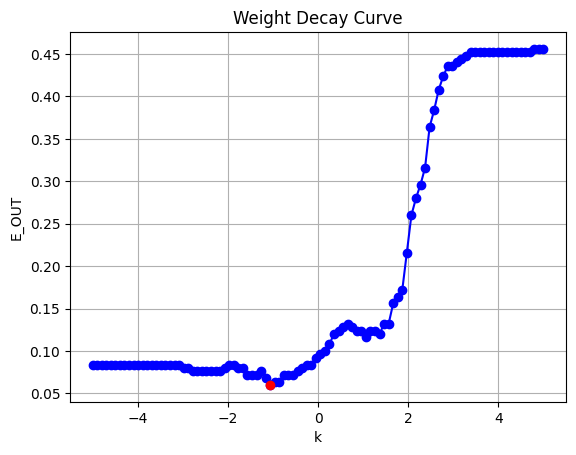

In [ ]:
# code to make graph for 5, 6

k_vals = []

# Initialize a list to store corresponding E_OUT values
E_OUT_vals = []

# Define a list of specific lambda values you want to highlight
highlighted_k_vals = [2, 1, 0, -1, -2]

# Define variables to keep track of the lowest E_OUT and its corresponding lambda
lowest_E_OUT = float('inf')
best_k = None


k_range = np.linspace(-5, 5, 100)

# calculate E_OUT for each k value and track the lowest value
for k in k_range:
    W_reg = lin_reg_reg(Z_train, Y_train, 10 ** k)
    E_OUT_reg = calc_error(Z_test, W_reg, Y_test, N_test)
    k_vals.append(k)
    E_OUT_vals.append(E_OUT_reg)

    if E_OUT_reg < lowest_E_OUT:
        lowest_E_OUT = E_OUT_reg
        best_k = k

# Create the graph
plt.figure()
plt.plot(k_vals, E_OUT_vals, marker='o', linestyle='-', color='b')  # Use plt.plot for a linear x-axis
plt.title('Weight Decay Curve')
plt.xlabel('k')
plt.ylabel('E_OUT')
plt.grid(True)

# mark the point with the lowest E_OUT
plt.scatter(best_k, lowest_E_OUT, color='red', label=f'Best k ({lowest_E_OUT:.4f})', zorder=5)

# mark specific lambda values
for highlighted_k in highlighted_k_vals:
    idx = k_vals.index(highlighted_k)
    plt.scatter(highlighted_k, E_OUT_vals[idx], color='green', label=f'k = {highlighted_k}', zorder=5)

plt.legend()
plt.show()
